In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-13 11:22:50.823224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 11:22:50.843595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 11:22:50.849838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 11:22:50.864925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-13 11:22:52.704527: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
628,SPUD,AutoMPG,turn,0.3,"{'knn': 42, 'OD_method': 'default', 'agg_metho...","{'42': 0.6306388056948347, '1738': 0.630638805...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.8384505075948647, '1738': 0.838877600...","{'42': 0.8169110997566806, '1738': 0.800613080...","{'42': 0.8107553856001751, '1738': 0.754752687...","{'42': 0.39819541471050524, '1738': 0.44548922...","{'42': 0.391665662330776, '1738': 0.4016829577...","{'42': {'RF-OOB': 0.8457081037678609, 'KNN': 0...","{'knn': 0.07015922052115621, 'OD_method': 0.11..."
1966,RF-NAMA,zoo,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.07920792079207921, '1738': 0.08910891...","{'42': 0.002842858543280071, '1738': 0.0023527...","{'42': 0.04375, '1738': 0.01875, '5271': 0.081...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': {'RF-OOB': 0.05, 'KNN': 0.0, 'RF': 0.0,...",{}
2132,RF-MASH,audiology,even,0.3,"{'knn': 2, 'page_rank': 'full', 'DTM': 'kl', '...",{'42': 0.49473684210526314},{'42': 0.11016620498614957},{'42': 0.6414473684210527},{'42': 0.47368421052631576},{'42': 0.34210526315789475},{'42': 0.29703751980373766},{'42': 0.4812673394716738},"{'42': {'RF-OOB': 0.6447368421052632, 'KNN': 0...","{'connection_limit': 0.01163496733616215, 'thr..."
1680,RF-SPUD,heart_failure,random,0.3,"{'knn': 56, 'OD_method': 'default', 'agg_metho...","{'42': 0.7926421404682275, '1738': 0.682274247...","{'42': 3.355667162559703e-05, '1738': 0.0, '52...","{'42': 0.7928870292887029, '1738': 0.713389121...","{'42': 0.65, '1738': 0.6, '5271': 0.675, '9209...","{'42': 0.6416666666666667, '1738': 0.583333333...","{'42': 0.6090909090909091, '1738': 0.598939265...","{'42': 0.6244064577397911, '1738': 0.616289592...","{'42': {'RF-OOB': 0.7531380753138075, 'KNN': 0...",{}
90,SPUD,ComputerHardware,even,0.3,"{'knn': 7, 'OD_method': 'default', 'agg_method...",{'42': 0.5675010338785853},{'42': 0.0005265447219614935},{'42': 0.6126204709612444},{'42': 0.7542600573471919},{'42': 0.5388712711044356},{'42': 0.9526429864722287},{'42': 0.6954356669569435},"{'42': {'RF-OOB': 0.5983915553006824, 'KNN': 0...","{'knn': 0.24202219418328647, 'OD_method': 0.13..."


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


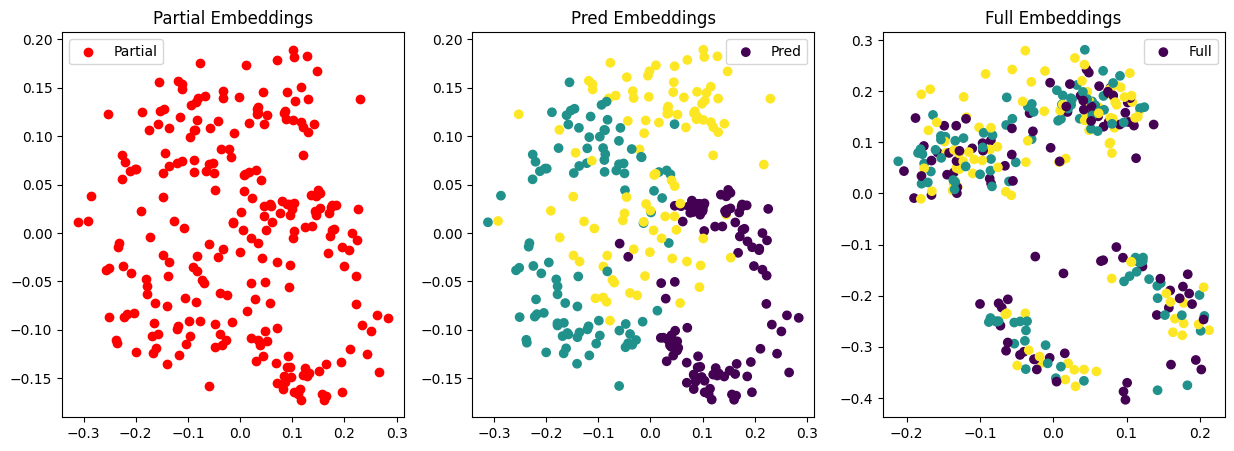

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

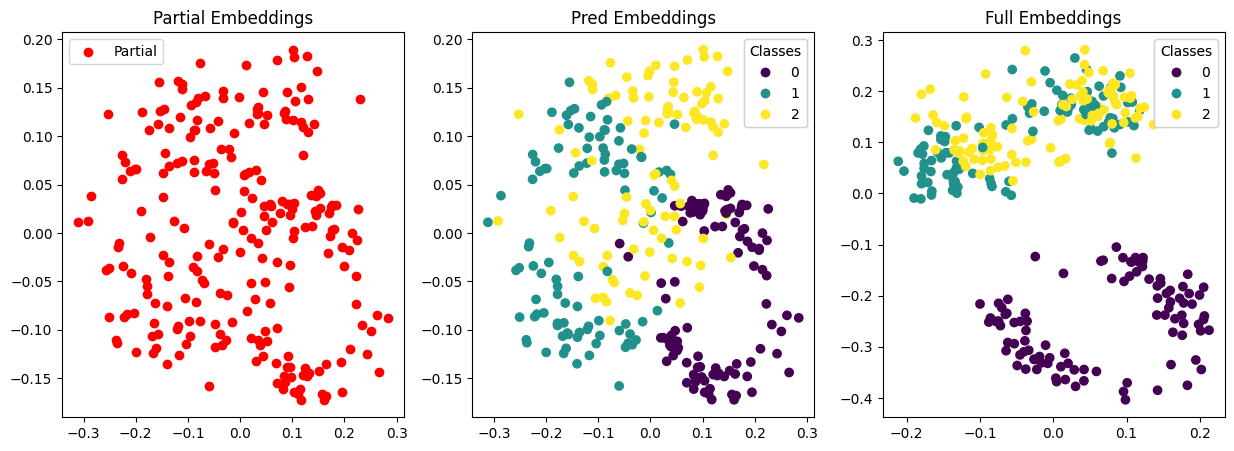

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


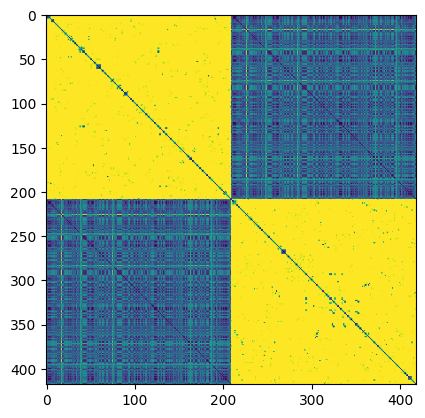

In [8]:
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
print(tasks[0])
plt.imshow(block_full)

# Marshall's Tests here?

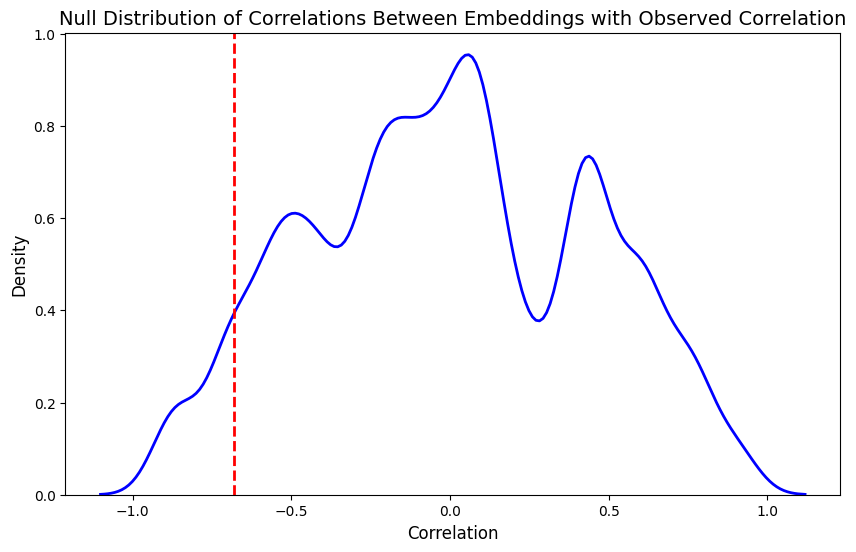

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/SPUD_iris_turn.json


In [9]:
#Unpack all the code and run the mantel test
r_obs, p_value = mantel_test(*iris_task, plot = True)

In [10]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[:5]
        )


/yunity/arusty/Graph-Manifold-Alignment/.venv/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
  0%|          | 0/5 [00:00<?, ?it/s]2025-01-13 11:24:12.357378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-13 11:24:12.376191: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-13 11:24:12.381898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 11:24:12.395605: I tensorflow/core/platf

ValueError: x and y must have length at least 2.

In [11]:
def debug_mantel_test(*args):
    print(f"Arguments passed to mantel_test: {args}")
    return mantel_test(*args)

with tqdm_joblib(tqdm(total=5)): #This includes a progress bar :)
    with Parallel(n_jobs=1) as parallel:
        parallel(
            delayed(debug_mantel_test)(*task)
            for task in tasks[:5]
        )

Arguments passed to mantel_test: ('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_ComputerHardware_even.json
Arguments passed to mantel_test: ('RF-MASH-', 'ComputerHardware', 'distort', {'knn': 2, 'page_rank': 'full', 'DTM': 'log', 'density_normalization': False})
Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH-_ComputerHardware_distort.json


Arguments passed to mantel_test: ('SPUD', 'ComputerHardware', 'random', {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'})





896it [03:07,  4.77it/s]


ValueError: x and y must have length at least 2.

# Marshall's Vizualizations Here?